### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display the image in a larger size

In [2]:
def display(img):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,1,1)
    ax.imshow(img,cmap='gray')

### Read 'coins_image.jpg' with cv2

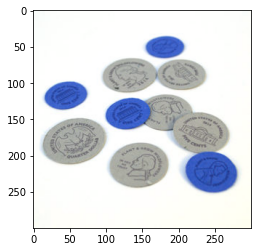

In [3]:
coins = cv2.imread('coins_image.jpg')
plt.imshow(coins)

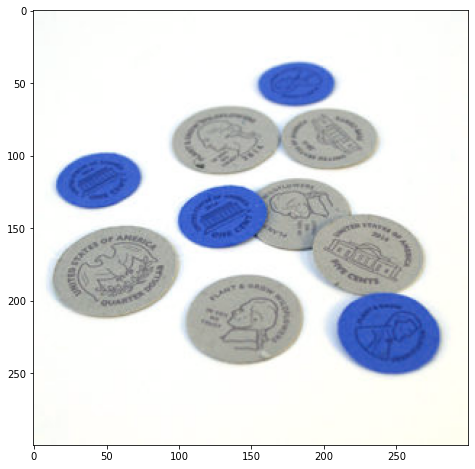

In [4]:
display(coins)

### Apply Median Blur

In [5]:
blur_coins = cv2.medianBlur(coins,13)


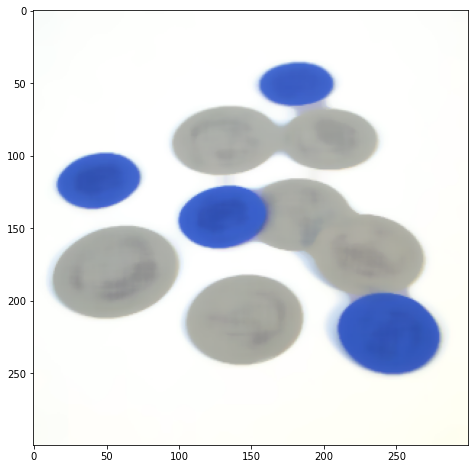

In [6]:
display(blur_coins)

### Convert to Grayscale

In [7]:
gray_coins = cv2.cvtColor(blur_coins,cv2.COLOR_BGR2GRAY) 


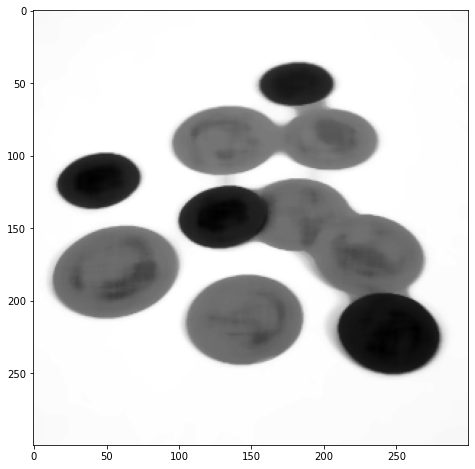

In [8]:
display(gray_coins)

### Apply threshold (Inverse binary with OTSU)

In [10]:
ret,thresh1 = cv2.threshold(gray_coins,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 


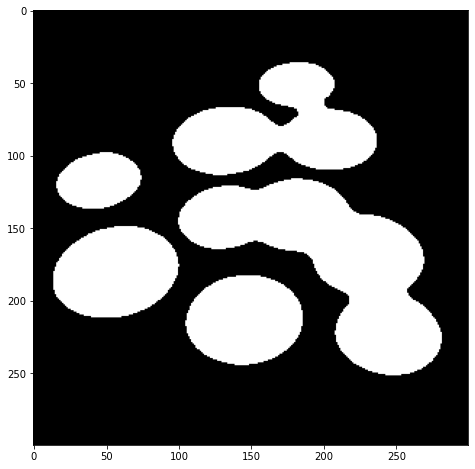

In [11]:
display(thresh1)

### Remove noise with the help of a morphological operator

In [68]:
kernel = np.ones((3,3))
opens = cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel,iterations=2)

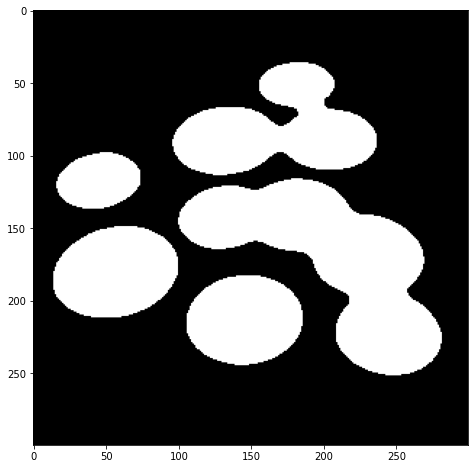

In [69]:
display(opens)

### Grab background that you are sure of

In [70]:
sure_bg  = cv2.dilate(opens,kernel,iterations=3)


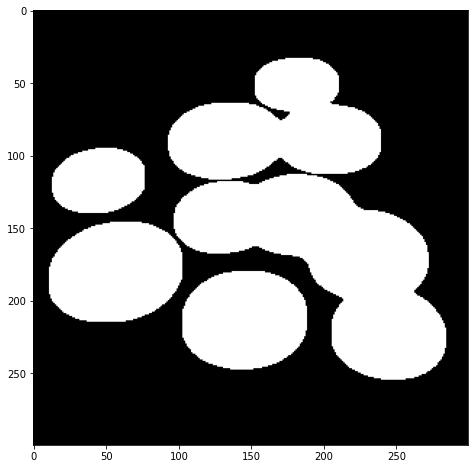

In [71]:
display(sure_bg)

### Find sure Foreground

In [72]:
dist_trans = cv2.distanceTransform(opens,cv2.DIST_L2,5)

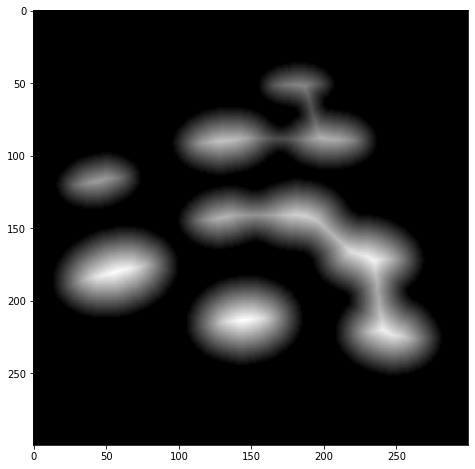

In [73]:
display(dist_trans)

In [83]:
ret,sure_fg = cv2.threshold(dist_trans,0.4*dist_trans.max(),255,0)

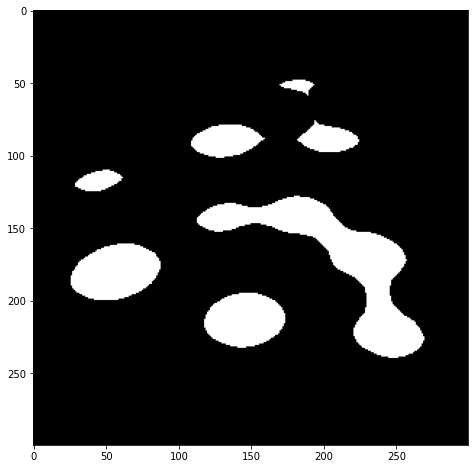

In [84]:
display(sure_fg)

### Find unknown region

In [87]:
sure_fg = np.uint8(sure_fg)

unkown = cv2.subtract(sure_bg,sure_fg)


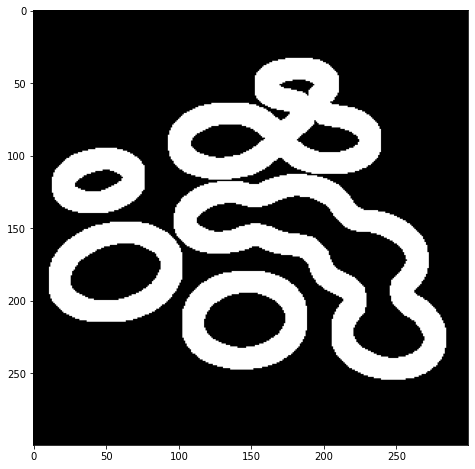

In [88]:
display(unkown)

### Label Markers of sure Foreground

In [91]:
ret,markers = cv2.connectedComponents(sure_fg)

markers=markers+1
markers[unkown==255]=0

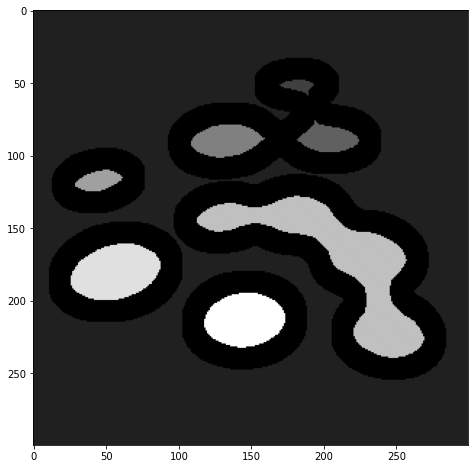

In [92]:
display(markers)

### Apply watersheld alogirithm to find markers

In [93]:
markers = cv2.watershed(coins,markers)


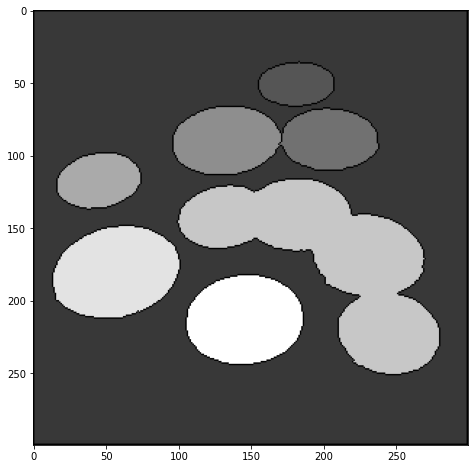

In [94]:
display(markers)

### Read the image again

In [95]:
coins = cv2.imread('coins_image.jpg')

### Find contours on Markers

In [97]:
cont,hier = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [98]:
len(cont)

14

In [99]:
for i in range(len(cont)):
    if hier[0][i][3] == -1:
        cv2.drawContours(coins,cont,i,(255,0,0),8)
        
        

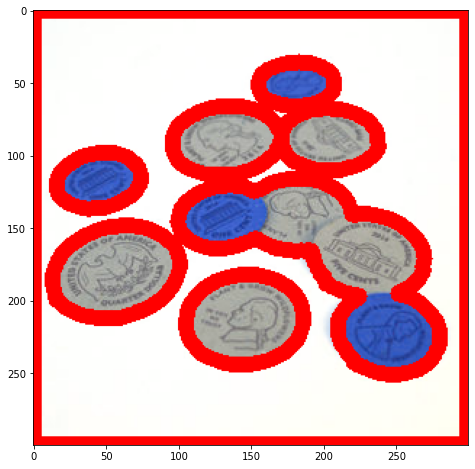

In [100]:
display(coins)

***